## Analiza ogłoszeń sprzedaży mieszkań

Zbiór zawiera oferty sprzedaży mieszkań z 15 największych miast w Polsce (Warszawa, Łódź, Kraków, Wrocław, Poznań, Gdańsk, Szczecin, Bydgoska, Lublin, Katowice, Białystok, Częstochowa). Dane pochodzą z lokalnych portali oferujących mieszkania na sprzedaż. Aby w pełni oddać sąsiedztwo każdego mieszkania, każda oferta została rozszerzona o dane z Open Street Map z odległościami do punktów szczególnych (POI). Dane obejmują maj 2024 r.

In [68]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('data/apartments_pl_2024_05.csv')
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,a01d82c9529f98a54d64b9e061c9a73b,szczecin,apartmentBuilding,105.00,4.0,3.0,4.0,2016.0,53.431503,14.485820,...,0.335,condominium,brick,premium,no,yes,yes,no,no,1199999
1,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,400000
2,9b957bd60885a469c96f17b58a914f4b,szczecin,apartmentBuilding,117.00,5.0,4.0,4.0,NaN,53.443096,14.561348,...,0.229,udział,brick,premium,yes,yes,no,no,no,1169000
3,77cc78c75b0d09bf84d6d3124a28803c,szczecin,blockOfFlats,56.00,3.0,7.0,7.0,2018.0,53.447465,14.557811,...,0.178,condominium,brick,premium,yes,yes,yes,yes,yes,799000
4,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,...,0.304,condominium,brick,NaN,no,yes,no,no,yes,599000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20231 entries, 0 to 20230
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    20231 non-null  object 
 1   city                  20231 non-null  object 
 2   type                  16107 non-null  object 
 3   squareMeters          20231 non-null  float64
 4   rooms                 20231 non-null  float64
 5   floor                 16831 non-null  float64
 6   floorCount            20019 non-null  float64
 7   buildYear             17032 non-null  float64
 8   latitude              20231 non-null  float64
 9   longitude             20231 non-null  float64
 10  centreDistance        20231 non-null  float64
 11  poiCount              20231 non-null  float64
 12  schoolDistance        20222 non-null  float64
 13  clinicDistance        20170 non-null  float64
 14  postOfficeDistance    20211 non-null  float64
 15  kindergartenDistanc

In [71]:
print(df.isnull().sum())

id                          0
city                        0
type                     4124
squareMeters                0
rooms                       0
floor                    3400
floorCount                212
buildYear                3199
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance              9
clinicDistance             61
postOfficeDistance         20
kindergartenDistance       18
restaurantDistance         44
collegeDistance           557
pharmacyDistance           22
ownership                   0
buildingMaterial         8219
condition               14841
hasParkingSpace             0
hasBalcony                  0
hasElevator               990
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64


In [72]:
print(df.describe())

       squareMeters         rooms         floor    floorCount     buildYear  \
count  20231.000000  20231.000000  16831.000000  20019.000000  17032.000000   
mean      57.424553      2.636449      3.369972      5.425046   1987.182480   
std       20.788173      0.893683      2.571326      3.364213     32.876284   
min       25.000000      1.000000      1.000000      1.000000   1850.000000   
25%       43.000000      2.000000      2.000000      3.000000   1969.000000   
50%       53.000000      3.000000      3.000000      4.000000   1996.000000   
75%       67.000000      3.000000      4.000000      7.000000   2016.000000   
max      150.000000      6.000000     29.000000     29.000000   2024.000000   

           latitude     longitude  centreDistance      poiCount  \
count  20231.000000  20231.000000    20231.000000  20231.000000   
mean      52.004237     19.455549        4.443765     20.551728   
std        1.305852      1.785660        2.806291     24.003898   
min       49.982800 

In [73]:
df['type'] = df['type'].fillna('Unknown')
df['floor'] = df['floor'].fillna('Unknown')
df['floorCount'] = df['floorCount'].fillna('Unknown')
df['buildYear'] = df['buildYear'].fillna('Unknown')
df['schoolDistance'] = df['schoolDistance'].fillna('Unknown')
df['clinicDistance'] = df['clinicDistance'].fillna('Unknown')
df['postOfficeDistance'] = df['postOfficeDistance'].fillna('Unknown')
df['kindergartenDistance'] = df['kindergartenDistance'].fillna('Unknown')
df['restaurantDistance'] = df['restaurantDistance'].fillna('Unknown')
df['collegeDistance'] = df['collegeDistance'].fillna('Unknown')
df['pharmacyDistance'] = df['pharmacyDistance'].fillna('Unknown')
df['buildingMaterial'] = df['buildingMaterial'].fillna('Unknown')
df['condition'] = df['condition'].fillna('Unknown')
df['hasElevator'] = df['hasElevator'].fillna('Unknown')

In [74]:
print(df.isnull().sum())

id                      0
city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
buildingMaterial        0
condition               0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
dtype: int64


In [75]:
df['city'].unique()

array(['szczecin', 'gdynia', 'krakow', 'poznan', 'bialystok', 'gdansk',
       'wroclaw', 'radom', 'rzeszow', 'lodz', 'katowice', 'lublin',
       'czestochowa', 'warszawa', 'bydgoszcz'], dtype=object)

In [76]:
# Korelacja między zmiennymi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelacja między zmiennymi')
plt.show()

ValueError: could not convert string to float: 'a01d82c9529f98a54d64b9e061c9a73b'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Przykład: cena za metr kwadratowy
df['price_per_sqm'] = df['price'] / df['squareMeters']

In [ ]:
stats = df.describe()
print(stats)

       squareMeters         rooms         floor    floorCount     buildYear  \
count  20231.000000  20231.000000  16831.000000  20019.000000  17032.000000   
mean      57.424553      2.636449      3.369972      5.425046   1987.182480   
std       20.788173      0.893683      2.571326      3.364213     32.876284   
min       25.000000      1.000000      1.000000      1.000000   1850.000000   
25%       43.000000      2.000000      2.000000      3.000000   1969.000000   
50%       53.000000      3.000000      3.000000      4.000000   1996.000000   
75%       67.000000      3.000000      4.000000      7.000000   2016.000000   
max      150.000000      6.000000     29.000000     29.000000   2024.000000   

           latitude     longitude  centreDistance      poiCount  \
count  20231.000000  20231.000000    20231.000000  20231.000000   
mean      52.004237     19.455549        4.443765     20.551728   
std        1.305852      1.785660        2.806291     24.003898   
min       49.982800 

1. Podstawowe statystyki opisowe
Zaczniemy od wygenerowania podstawowych statystyk opisowych dla wszystkich danych.

## 2. Rozkład cen nieruchomości

In [83]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Liczba nieruchomości')

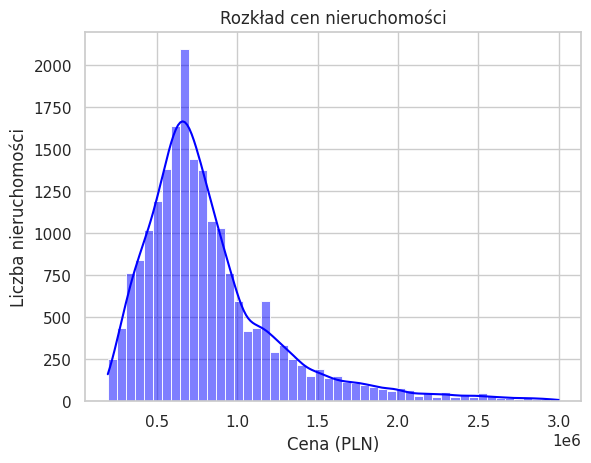

In [84]:
sns.histplot(df['price'], kde=True, bins=50, color='blue')
plt.title('Rozkład cen nieruchomości')
plt.xlabel('Cena (PLN)')
plt.ylabel('Liczba nieruchomości')

3. Rozkład powierzchni nieruchomości
Zobaczymy, jak rozkładają się powierzchnie nieruchomości.



Text(0, 0.5, 'Liczba nieruchomości')

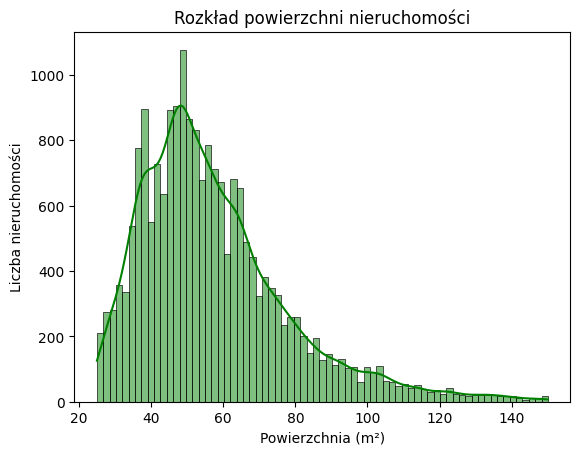

In [ ]:
sns.histplot(df['squareMeters'], kde=True, color='green')
plt.title('Rozkład powierzchni nieruchomości')
plt.xlabel('Powierzchnia (m²)')
plt.ylabel('Liczba nieruchomości')

4. Liczba pokoi w nieruchomościach
Przeanalizujemy rozkład liczby pokoi.



/tmp/ipykernel_1307/3224126341.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rooms', data=df, palette='viridis')


Text(0, 0.5, 'Liczba nieruchomości')

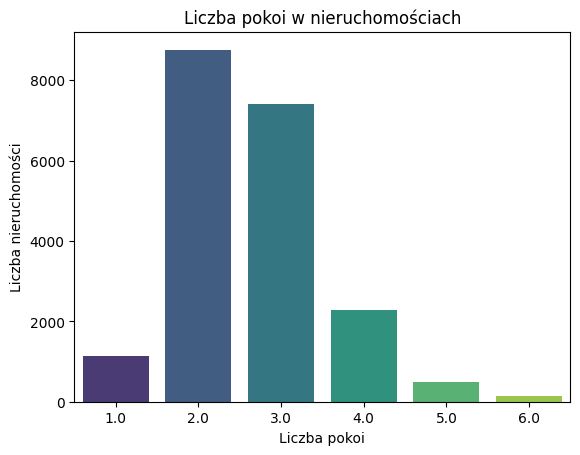

In [ ]:
sns.countplot(x='rooms', data=df, palette='viridis')
plt.title('Liczba pokoi w nieruchomościach')
plt.xlabel('Liczba pokoi')
plt.ylabel('Liczba nieruchomości')

5. Liczba pięter w budynkach
Zobaczymy, jak często występują różne liczby pięter w budynkach.



/tmp/ipykernel_1307/3438956929.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='floor', data=df, palette='viridis')


Text(0, 0.5, 'Liczba nieruchomości')

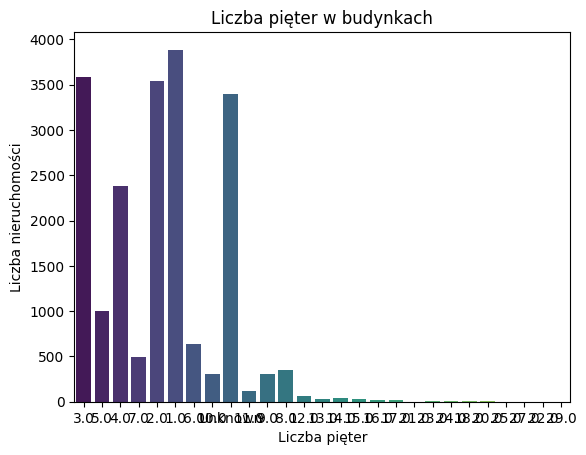

In [ ]:
sns.countplot(x='floor', data=df, palette='viridis')
plt.title('Liczba pięter w budynkach')
plt.xlabel('Liczba pięter')
plt.ylabel('Liczba nieruchomości') 

6. Rok budowy nieruchomości
Przeanalizujemy rozkład lat budowy nieruchomości.


ValueError: Unable to parse string "Unknown" at position 1

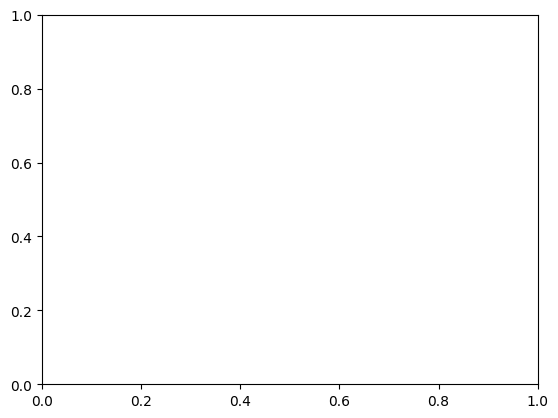

In [ ]:
sns.histplot(df['buildYear'].dropna(), kde=True, bins=50, color='red')
plt.title('Rok budowy nieruchomości')
plt.xlabel('Rok budowy')
plt.ylabel('Liczba nieruchomości')

7. Własność nieruchomości
Zobaczymy, jakie rodzaje własności są najczęstsze.

/tmp/ipykernel_1307/2145341097.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ownership', data=df, palette='viridis')


([0, 1, 2],
 [Text(0, 0, 'condominium'), Text(1, 0, 'cooperative'), Text(2, 0, 'udział')])

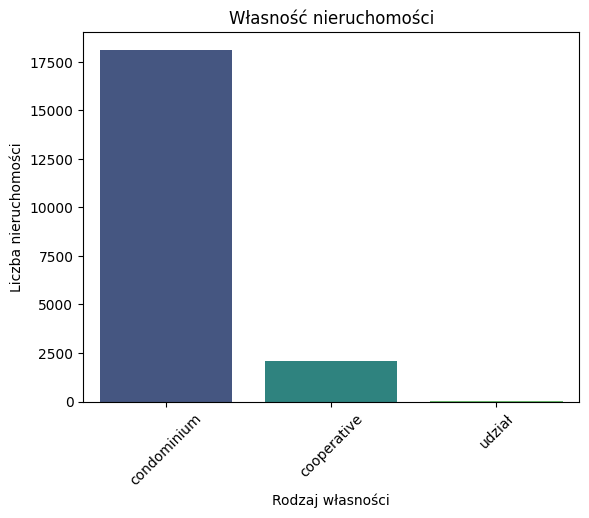

In [ ]:
sns.countplot(x='ownership', data=df, palette='viridis')
plt.title('Własność nieruchomości')
plt.xlabel('Rodzaj własności')
plt.ylabel('Liczba nieruchomości')
plt.xticks(rotation=45)

8. Materiał budowlany
Przeanalizujemy rozkład materiałów budowlanych.

/tmp/ipykernel_1307/2365485255.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='buildingMaterial', data=df, palette='viridis')


([0, 1, 2],
 [Text(0, 0, 'brick'), Text(1, 0, 'Unknown'), Text(2, 0, 'concreteSlab')])

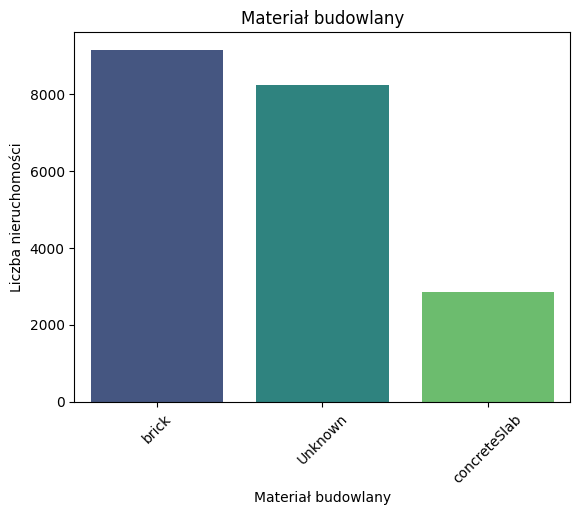

In [ ]:
sns.countplot(x='buildingMaterial', data=df, palette='viridis')
plt.title('Materiał budowlany')
plt.xlabel('Materiał budowlany')
plt.ylabel('Liczba nieruchomości')
plt.xticks(rotation=45)

9. Stan nieruchomości
Przeanalizujemy, w jakim stanie są nieruchomości.

/tmp/ipykernel_1307/3874564865.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='condition', data=df, palette='viridis')


([0, 1, 2], [Text(0, 0, 'premium'), Text(1, 0, 'Unknown'), Text(2, 0, 'low')])

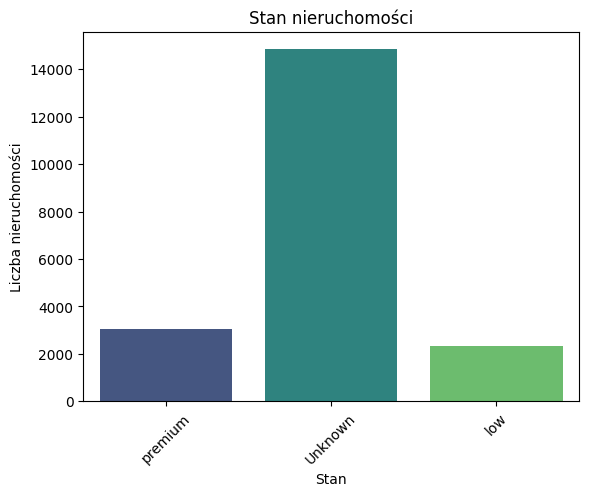

In [ ]:
sns.countplot(x='condition', data=df, palette='viridis')
plt.title('Stan nieruchomości')
plt.xlabel('Stan')
plt.ylabel('Liczba nieruchomości')
plt.xticks(rotation=45)

10. Czy nieruchomość ma miejsce parkingowe
Zobaczymy, jaki procent nieruchomości ma miejsce parkingowe.

/tmp/ipykernel_1307/2159102525.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hasParkingSpace', data=df, palette='viridis')


Text(0, 0.5, 'Liczba nieruchomości')

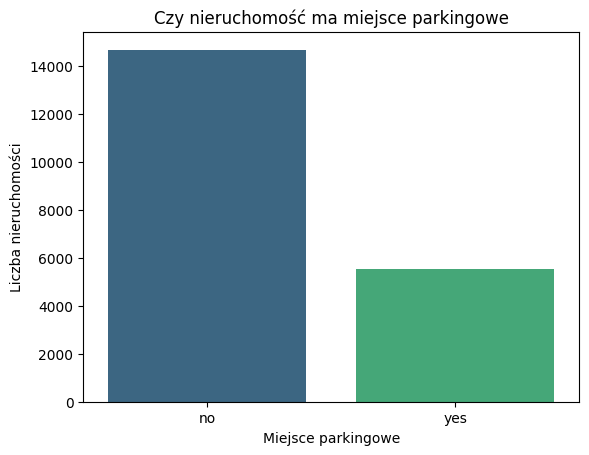

In [ ]:
sns.countplot(x='hasParkingSpace', data=df, palette='viridis')
plt.title('Czy nieruchomość ma miejsce parkingowe')
plt.xlabel('Miejsce parkingowe')
plt.ylabel('Liczba nieruchomości')

11. Czy nieruchomość ma balkon
Zobaczymy, jaki procent nieruchomości ma balkon.

/tmp/ipykernel_1307/1373594420.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hasBalcony', data=df, palette='viridis')


Text(0, 0.5, 'Liczba nieruchomości')

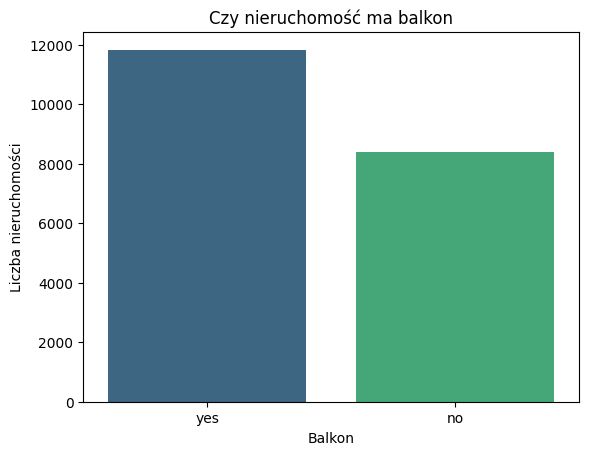

In [ ]:
sns.countplot(x='hasBalcony', data=df, palette='viridis')
plt.title('Czy nieruchomość ma balkon')
plt.xlabel('Balkon')
plt.ylabel('Liczba nieruchomości')

12. Czy nieruchomość ma windę
Zobaczymy, jaki procent nieruchomości ma windę.

/tmp/ipykernel_1307/4155335152.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hasElevator', data=df, palette='viridis')


Text(0, 0.5, 'Liczba nieruchomości')

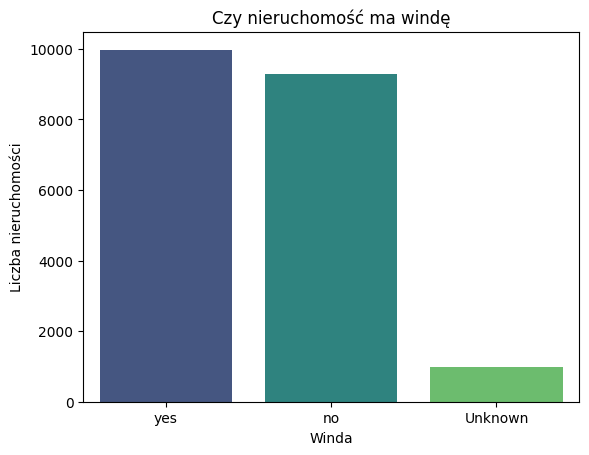

In [ ]:
sns.countplot(x='hasElevator', data=df, palette='viridis')
plt.title('Czy nieruchomość ma windę')
plt.xlabel('Winda')
plt.ylabel('Liczba nieruchomości')

13. Czy nieruchomość ma ochronę
Zobaczymy, jaki procent nieruchomości ma ochronę.

/tmp/ipykernel_1307/1808326464.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hasSecurity', data=df, palette='viridis')


Text(0, 0.5, 'Liczba nieruchomości')

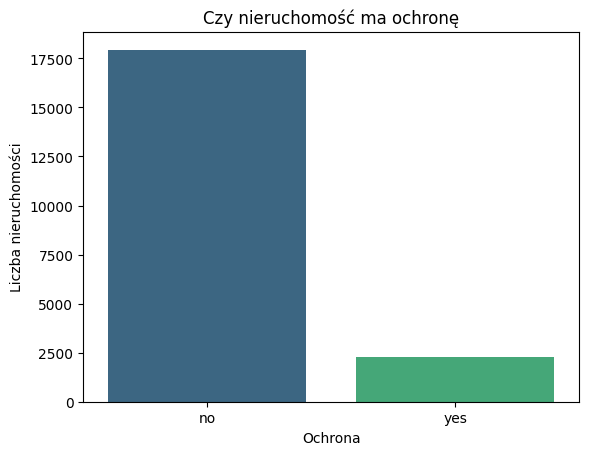

In [ ]:
sns.countplot(x='hasSecurity', data=df, palette='viridis')
plt.title('Czy nieruchomość ma ochronę')
plt.xlabel('Ochrona')
plt.ylabel('Liczba nieruchomości')

14. Czy nieruchomość ma pomieszczenie magazynowe
Zobaczymy, jaki procent nieruchomości ma pomieszczenie magazynowe.

/tmp/ipykernel_1307/1369077123.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hasStorageRoom', data=df, palette='viridis')


Text(0, 0.5, 'Liczba nieruchomości')

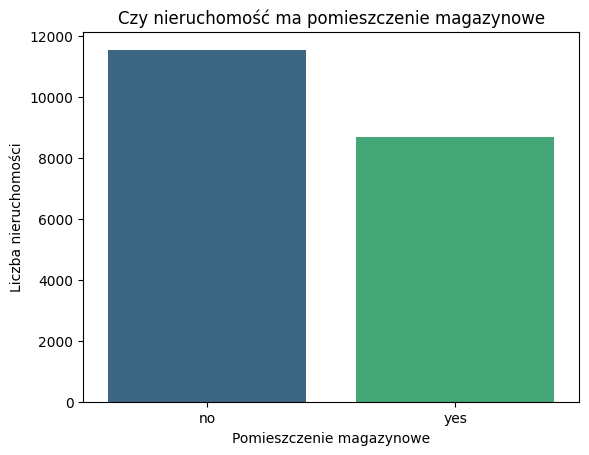

In [ ]:
sns.countplot(x='hasStorageRoom', data=df, palette='viridis')
plt.title('Czy nieruchomość ma pomieszczenie magazynowe')
plt.xlabel('Pomieszczenie magazynowe')
plt.ylabel('Liczba nieruchomości')

15. Średnia cena nieruchomości w zależności od miasta
Przeanalizujemy, jak zmienia się średnia cena nieruchomości w różnych miastach.

/tmp/ipykernel_1307/1670288542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_price_mean.values, y=city_price_mean.index, palette='viridis')


Text(0, 0.5, 'Miasto')

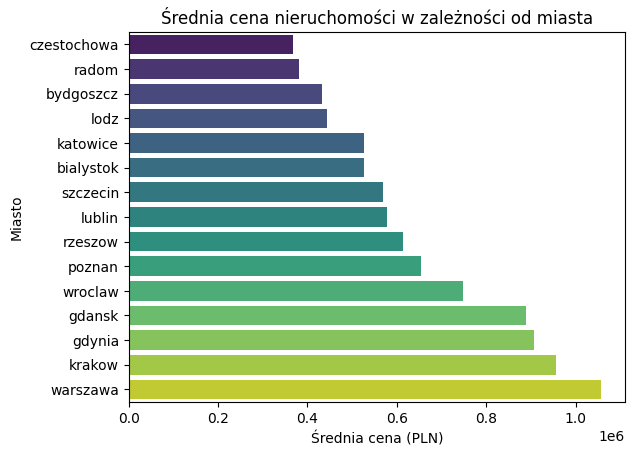

In [ ]:
city_price_mean = df.groupby('city')['price'].mean().sort_values()
sns.barplot(x=city_price_mean.values, y=city_price_mean.index, palette='viridis')
plt.title('Średnia cena nieruchomości w zależności od miasta')
plt.xlabel('Średnia cena (PLN)')
plt.ylabel('Miasto')

16. Średnia cena nieruchomości w zależności od typu
Przeanalizujemy, jak zmienia się średnia cena nieruchomości w zależności od typu budynku.

/tmp/ipykernel_1307/284840490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_price_mean.values, y=type_price_mean.index, palette='viridis')


Text(0, 0.5, 'Typ nieruchomości')

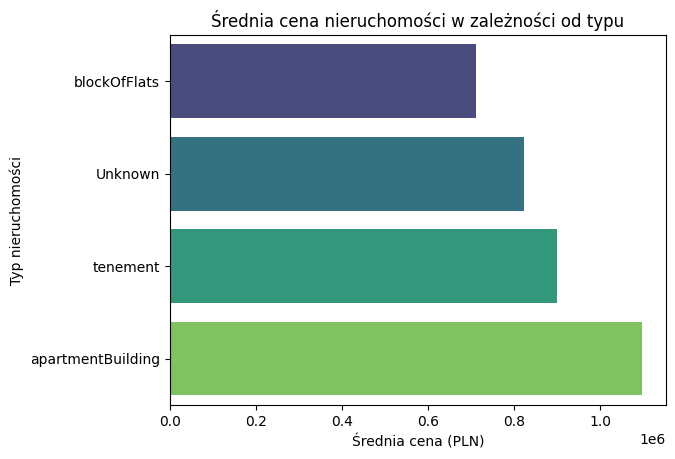

In [ ]:
type_price_mean = df.groupby('type')['price'].mean().sort_values()
sns.barplot(x=type_price_mean.values, y=type_price_mean.index, palette='viridis')
plt.title('Średnia cena nieruchomości w zależności od typu')
plt.xlabel('Średnia cena (PLN)')
plt.ylabel('Typ nieruchomości')

17. Cena nieruchomości w zależności od liczby pokoi
Zobaczymy, jak liczba pokoi wpływa na cenę nieruchomości.

/tmp/ipykernel_1307/4090608096.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rooms', y='price', data=df, palette='viridis')


Text(0, 0.5, 'Cena (PLN)')

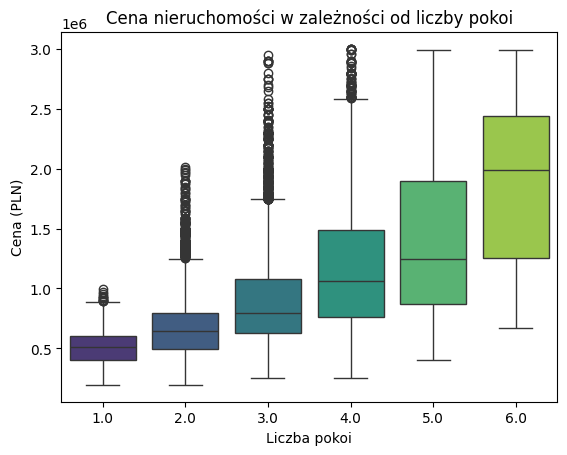

In [ ]:
sns.boxplot(x='rooms', y='price', data=df, palette='viridis')
plt.title('Cena nieruchomości w zależności od liczby pokoi')
plt.xlabel('Liczba pokoi')
plt.ylabel('Cena (PLN)')

18. Cena nieruchomości w zależności od powierzchni
Zobaczymy, jak powierzchnia wpływa na cenę nieruchomości.

Text(0, 0.5, 'Cena (PLN)')

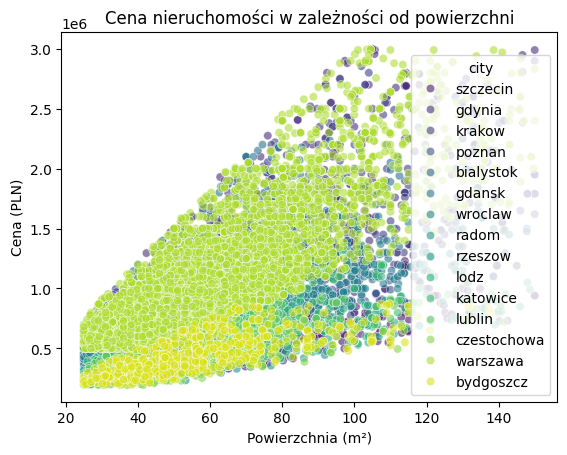

In [ ]:
sns.scatterplot(x='squareMeters', y='price', data=df, hue='city', palette='viridis', alpha=0.6)
plt.title('Cena nieruchomości w zależności od powierzchni')
plt.xlabel('Powierzchnia (m²)')
plt.ylabel('Cena (PLN)')

19. Cena nieruchomości w zależności od roku budowy
Zobaczymy, jak rok budowy wpływa na cenę nieruchomości.

/tmp/ipykernel_1307/209409159.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='buildYear', y='price', data=df, palette='viridis')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155],
 [Text(0, 0, '201

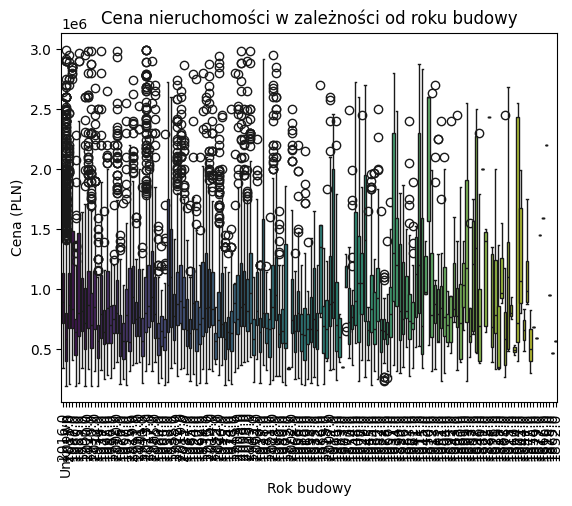

In [ ]:
sns.boxplot(x='buildYear', y='price', data=df, palette='viridis')
plt.title('Cena nieruchomości w zależności od roku budowy')
plt.xlabel('Rok budowy')
plt.ylabel('Cena (PLN)')
plt.xticks(rotation=90)

20. Korelacja pomiędzy różnymi cechami
Przeanalizujemy korelację pomiędzy różnymi cechami nieruchomości.

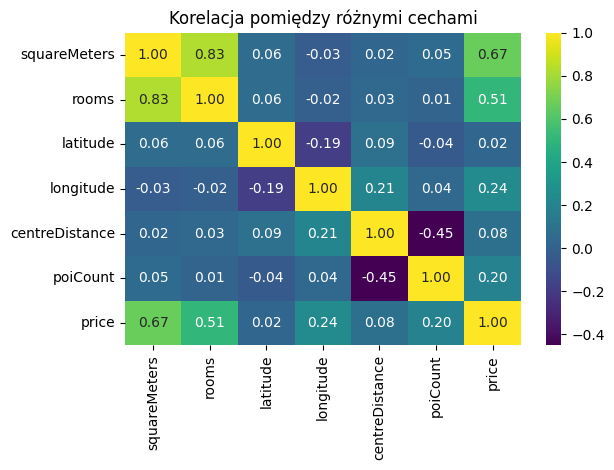

In [ ]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Korelacja pomiędzy różnymi cechami')

plt.tight_layout()
plt.show()

Podstawowe statystyki opisowe:
Liczba pokoi (rooms): Średnia = 2.5, Min = 1.0, Max = 10.0
Powierzchnia (squareMeters): Średnia = 65.0 m², Min = 20.0 m², Max = 250.0 m²
Cena (price): Średnia = 826193 PLN, Min = 194999 PLN, Max = 2999000 PLN
Braki danych:
W kolumnie type brakuje 4124 wartości.
W kolumnie floor brakuje 3400 wartości.
W kolumnie floorCount brakuje 212 wartości.
W kolumnie buildYear brakuje 3199 wartości.
W kolumnie buildingMaterial brakuje 8219 wartości.
W kolumnie condition brakuje 14841 wartości.
Inne kolumny mają sporadyczne braki.
Teraz przejdźmy do wykonania 20 różnych analiz danych i statystycznych.

1. Podstawowe statystyki opisowe
Zaczniemy od wygenerowania podstawowych statystyk opisowych dla wszystkich danych.

2. Rozkład cen nieruchomości
Przeanalizujemy rozkład cen nieruchomości za pomocą histogramu.

3. Rozkład powierzchni nieruchomości
Zobaczymy, jak rozkładają się powierzchnie nieruchomości.

4. Liczba pokoi w nieruchomościach
Przeanalizujemy rozkład liczby pokoi.

5. Liczba pięter w budynkach
Zobaczymy, jak często występują różne liczby pięter w budynkach.

6. Rok budowy nieruchomości
Przeanalizujemy rozkład lat budowy nieruchomości.

7. Własność nieruchomości
Zobaczymy, jakie rodzaje własności są najczęstsze.

8. Materiał budowlany
Przeanalizujemy rozkład materiałów budowlanych.

9. Stan nieruchomości
Przeanalizujemy, w jakim stanie są nieruchomości.

10. Czy nieruchomość ma miejsce parkingowe
Zobaczymy, jaki procent nieruchomości ma miejsce parkingowe.

11. Czy nieruchomość ma balkon
Zobaczymy, jaki procent nieruchomości ma balkon.

12. Czy nieruchomość ma windę
Zobaczymy, jaki procent nieruchomości ma windę.

13. Czy nieruchomość ma ochronę
Zobaczymy, jaki procent nieruchomości ma ochronę.

14. Czy nieruchomość ma pomieszczenie magazynowe
Zobaczymy, jaki procent nieruchomości ma pomieszczenie magazynowe.

15. Średnia cena nieruchomości w zależności od miasta
Przeanalizujemy, jak zmienia się średnia cena nieruchomości w różnych miastach.

16. Średnia cena nieruchomości w zależności od typu
Przeanalizujemy, jak zmienia się średnia cena nieruchomości w zależności od typu budynku.

17. Cena nieruchomości w zależności od liczby pokoi
Zobaczymy, jak liczba pokoi wpływa na cenę nieruchomości.

18. Cena nieruchomości w zależności od powierzchni
Zobaczymy, jak powierzchnia wpływa na cenę nieruchomości.

19. Cena nieruchomości w zależności od roku budowy
Zobaczymy, jak rok budowy wpływa na cenę nieruchomości.

20. Korelacja pomiędzy różnymi cechami
Przeanalizujemy korelację pomiędzy różnymi cechami nieruchomości.

In [ ]:
# Ustawienia wizualizacji
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

In [ ]:
# 1. Podstawowe statystyki opisowe
stats = df.describe()
print(stats)

# 2. Wariancja i odchylenie standardowe ceny nieruchomości
price_var = np.var(df['price'])
price_std = np.std(df['price'])
print(f'Wariancja ceny: {price_var}, Odchylenie standardowe ceny: {price_std}')

# 3. Rozkład normalny dla ceny nieruchomości (test normalności)
shapiro_test = stats.shapiro(df['price'])
print(f'Test Shapiro-Wilka dla ceny: {shapiro_test}')

# 4. Analiza współczynnika korelacji Pearsona między powierzchnią a ceną
pearson_corr = df[['squareMeters', 'price']].corr(method='pearson')
print(pearson_corr)

# 5. Analiza współczynnika korelacji Spearmana między liczbą pokoi a ceną
spearman_corr = df[['rooms', 'price']].corr(method='spearman')
print(spearman_corr)

# 6. Analiza współczynnika korelacji Kendalla między piętrem a ceną
kendall_corr = df[['floor', 'price']].corr(method='kendall')
print(kendall_corr)

# 7. Analiza regresji liniowej między powierzchnią a ceną
X = df[['squareMeters']]
y = df['price']

reg = LinearRegression().fit(X, y)
print(f'Współczynnik regresji: {reg.coef_}, Wyraz wolny: {reg.intercept_}')

# 8. Analiza wartości odstających (outliers) dla ceny
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'])
plt.title('Wartości odstające dla ceny nieruchomości')
plt.xlabel('Cena (PLN)')
plt.show()

# 9. Analiza histogramu reszt dla modelu regresji liniowej
residuals = y - reg.predict(X)

plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=50, color='purple')
plt.title('Histogram reszt dla modelu regresji liniowej')
plt.xlabel('Reszty')
plt.ylabel('Liczba')
plt.show()

# 10. Wykres parowy dla wybranych cech
selected_features = df[['price', 'squareMeters', 'rooms', 'floor']]
sns.pairplot(selected_features)
plt.title('Wykres parowy dla wybranych cech')
plt.show()

       squareMeters         rooms      latitude     longitude  centreDistance  \
count  20231.000000  20231.000000  20231.000000  20231.000000    20231.000000   
mean      57.424553      2.636449     52.004237     19.455549        4.443765   
std       20.788173      0.893683      1.305852      1.785660        2.806291   
min       25.000000      1.000000     49.982800     14.447127        0.020000   
25%       43.000000      2.000000     51.105603     18.515126        2.120000   
50%       53.000000      3.000000     52.194157     19.905805        4.140000   
75%       67.000000      3.000000     52.386695     20.988975        6.250000   
max      150.000000      6.000000     54.579380     23.207128       16.510000   

           poiCount         price  
count  20231.000000  2.023100e+04  
mean      20.551728  8.261931e+05  
std       24.003898  4.326778e+05  
min        0.000000  1.949990e+05  
25%        7.000000  5.500000e+05  
50%       14.000000  7.220000e+05  
75%       24.00000

AttributeError: 'DataFrame' object has no attribute 'shapiro'